In [19]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar datasets
from google.colab import drive
drive.mount('/content/drive')

test = pd.read_csv("/content/drive/MyDrive/DATASETS/regresion/test.csv")
train = pd.read_csv("/content/drive/MyDrive/DATASETS/regresion/train.csv")

# Revisar dimensiones
print("Tamaño train:", train.shape)
print("Tamaño test:", test.shape)

# Primeras filas
print(train.head())

# Información de columnas
print(train.info())

# Revisar valores nulos
print(train.isnull().sum())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tamaño train: (750000, 9)
Tamaño test: (250000, 8)
   id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null

In [20]:
# Revisar las columnas de train y test
print("Columnas en TRAIN:\n", train.columns)
print("\nColumnas en TEST:\n", test.columns)


Columnas en TRAIN:
 Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

Columnas en TEST:
 Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')


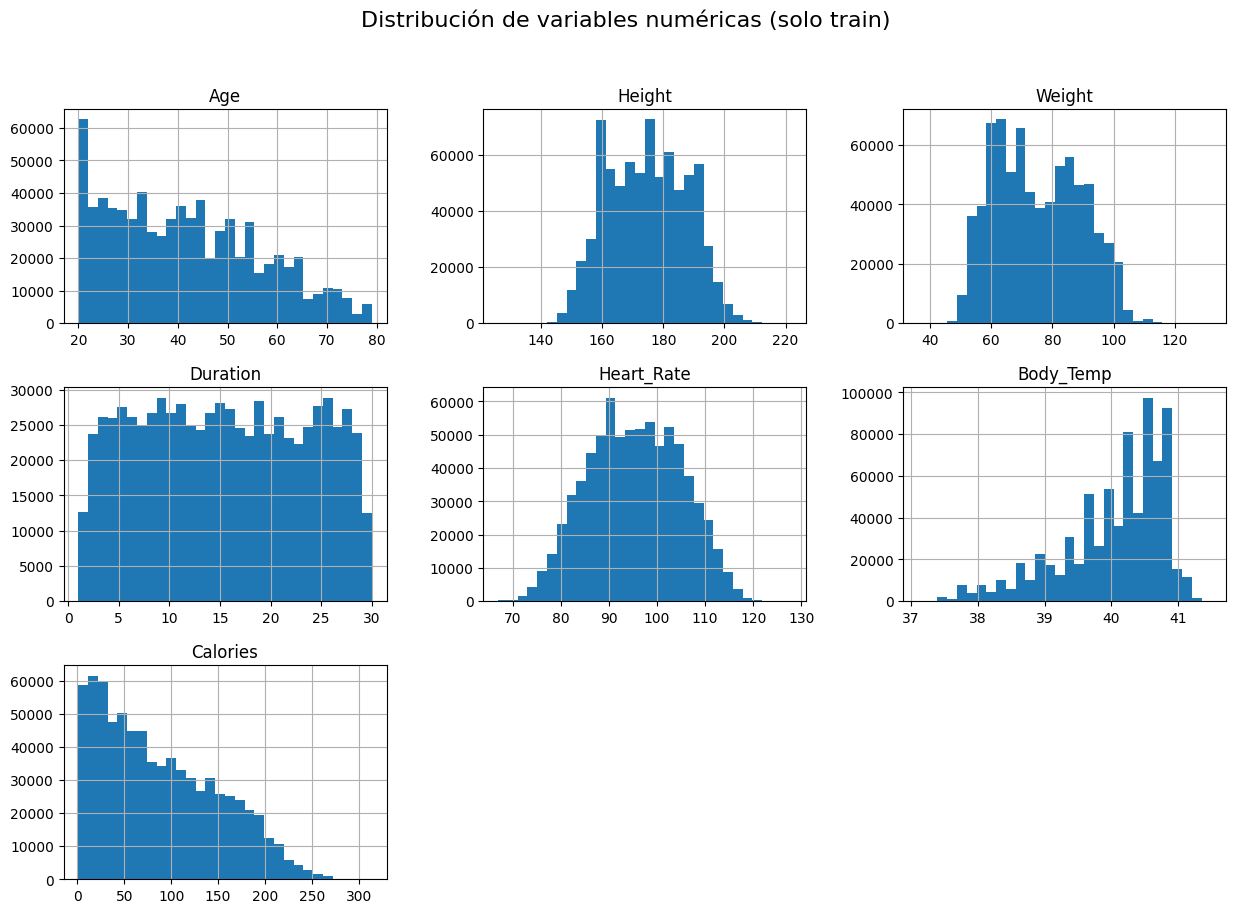

In [21]:
# Usamos solo train para graficar
num_vars_test = ['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Calories']

train[num_vars_train].hist(bins=30, figsize=(15,10))
plt.suptitle("Distribución de variables numéricas (solo train)", fontsize=16)
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Copiamos el dataset de entrenamiento
df = train.copy()

# Codificar Sex (0=female, 1=male)
df['Sex'] = df['Sex'].map({'female':0, 'male':1})

# Eliminar columna id
df = df.drop(columns=['id'])

# Separar features (X) y target (y)
X = df.drop(columns=['Calories'])
y = df['Calories']

# Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Tamaño X_train:", X_train.shape)
print("Tamaño X_val:", X_val.shape)


Tamaño X_train: (600000, 7)
Tamaño X_val: (150000, 7)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definimos los modelos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Diccionario para resultados
results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Entrenamiento
    y_pred = model.predict(X_val_scaled)  # Predicciones

    # Métricas
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

# Mostrar resultados
results_df = pd.DataFrame(results).T
print(results_df)


                        MAE       RMSE        R2
Linear Regression  8.082859  11.058772  0.968445
Random Forest      2.309292   3.822297  0.996230
Gradient Boosting  3.173100   4.751223  0.994175


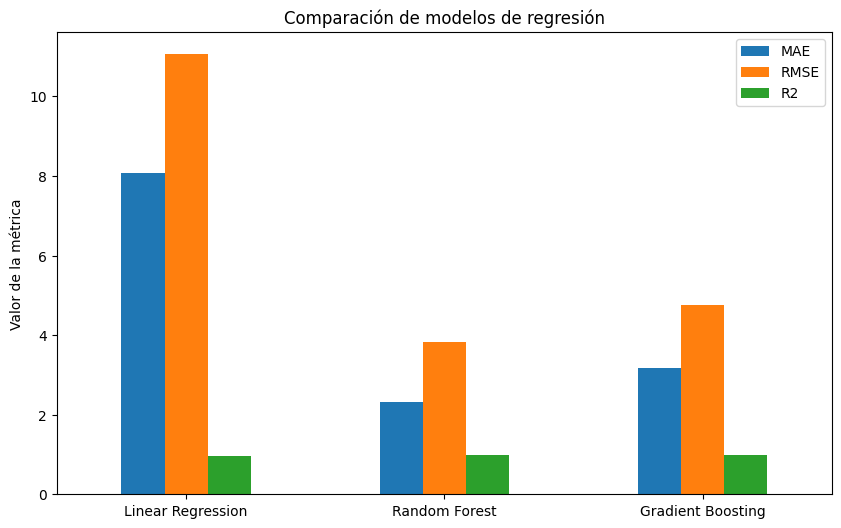

In [24]:
# Gráfico de comparación de métricas
results_df.plot(kind='bar', figsize=(10,6))
plt.title("Comparación de modelos de regresión")
plt.ylabel("Valor de la métrica")
plt.xticks(rotation=0)
plt.show()


**Conclusiones finales**

1.Importancia de las variables
El análisis exploratorio y las correlaciones mostraron que variables como Duration (duración del ejercicio), Heart Rate (frecuencia cardíaca) y Body Temperature (temperatura corporal) son determinantes para predecir el gasto calórico. Esto concuerda con la evidencia médica: la intensidad, el tiempo y las condiciones fisiológicas influyen directamente en el consumo energético.

2.Comparación de modelos

La Regresión Lineal logró un buen desempeño (R² ≈ 0.96), pero mostró limitaciones al capturar relaciones no lineales.

El Gradient Boosting mejoró la precisión (R² ≈ 0.99), ajustándose mejor a los patrones complejos.

El Random Forest fue el modelo con mejor rendimiento general (MAE ≈ 2.3, R² ≈ 0.996), mostrando gran capacidad predictiva y robustez frente a ruido en los datos.

3.Aplicabilidad práctica
El modelo de Random Forest podría integrarse en aplicaciones de salud y fitness, ofreciendo estimaciones personalizadas del gasto calórico a partir de variables fáciles de medir (tiempo, frecuencia cardíaca, temperatura, edad, peso, etc.). Esto permitiría a los usuarios llevar un control más realista de su gasto energético.

4.Limitaciones y próximos pasos

El dataset es relativamente pequeño y controlado; se recomienda probar con muestras más amplias y diversas para garantizar mayor generalización.

Incluir otras variables contextuales (tipo de ejercicio, nivel de entrenamiento, metabolismo basal) podría enriquecer la precisión del modelo.

Se debería evaluar la presencia de sobreajuste en Random Forest, ya que su R² muy alto podría indicar que memoriza patrones específicos del conjunto de entrenamiento.